# RuntimeAnalysis.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IDMInterface import IDMSimulation

import time
from scipy.optimize import curve_fit

## Running the simulation and measuring the runtime

In [2]:
#car_nums = [10,20,30,40,50,60,70,80,90,100,140,150,160]
car_nums = [10,20,30,40,50,60,70,80,90,100]

runtime_us = []
runtime_eu = []

length = 1500
lanes = 3
steps = 600*30
for car_num in car_nums:
    start = time.time()
    fn, df = IDMSimulation(road_length=length,
                      cars=car_num,
                      lanes=3,
                      step_width=1/30,                
                      steps=steps,
                      EU=True)
    end = time.time()
    T = end - start
    runtime_eu.append(T)
    start = time.time()
    fn, df = IDMSimulation(road_length=length,
                      cars=car_num,
                      lanes=3,
                      step_width=1/30,                
                      steps=steps,
                      EU=False)
    end = time.time()
    T = end - start
    runtime_us.append(T)

microscopicIDM --road-length 1500 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 18000 --output-csv /tmp/IDM/1500_10_3_0.03333333333333333_18000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 18000 --output-csv /tmp/IDM/1500_10_3_0.03333333333333333_18000.csv
microscopicIDM --road-length 1500 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 18000 --output-csv /tmp/IDM/1500_20_3_0.03333333333333333_18000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 18000 --output-csv /tmp/IDM/1500_20_3_0.03333333333333333_18000.csv
microscopicIDM --road-length 1500 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integration-steps 18000 --output-csv /tmp/IDM/1500_30_3_0.03333333333333333_18000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integrati

In [3]:
def simple_polynomial(x,a,N):
    return a * x**N

popt, pcov = curve_fit(simple_polynomial, car_nums, runtime_eu)
a_eu, N_eu = popt
err = np.sqrt(np.diag(pcov))
a_eu_err, N_eu_err = err

print(f'a_eu = {a_eu:.4f} +/- {a_eu_err:.4}')
print(f'N_eu = {N_eu:.4f} +/- {N_eu_err:.4}')

popt, pcov = curve_fit(simple_polynomial, car_nums, runtime_us)
a_us, N_us = popt
err = np.sqrt(np.diag(pcov))
a_us_err, N_us_err = err

print(f'a_us = {a_us:.4f} +/- {a_us_err:.4}')
print(f'N_us = {N_eu:.4f} +/- {N_us_err:.4}')

a_eu = 0.0005 +/- 3.401e-05
N_eu = 2.8203 +/- 0.01614
a_us = 0.0081 +/- 0.0008364
N_us = 2.8203 +/- 0.0235


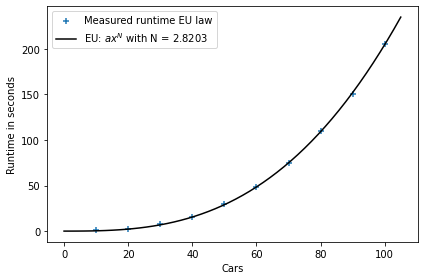

In [4]:
plt.scatter(car_nums, runtime_eu, label='Measured runtime EU law',
           marker='+')
x = np.linspace(0, car_nums[-1]+5)
plt.plot(x, simple_polynomial(x,a_eu,N_eu), color='k',
        label=rf'EU: $a x^N$ with N = {N_eu:.4f}')

plt.xlabel('Cars')
plt.ylabel('Runtime in seconds')
plt.legend()
plt.tight_layout()
plt.savefig('runtime_EU.pdf')

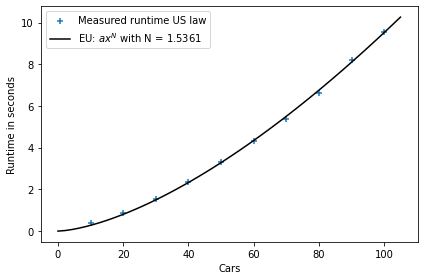

In [5]:
plt.scatter(car_nums, runtime_us, label='Measured runtime US law',
           marker='+')
x = np.linspace(0, car_nums[-1]+5)
plt.plot(x, simple_polynomial(x,a_us,N_us), color='k',
        label=rf'EU: $a x^N$ with N = {N_us:.4f}')

plt.xlabel('Cars')
plt.ylabel('Runtime in seconds')
plt.legend()
plt.tight_layout()
plt.savefig('runtime_US.pdf')